# Empirical Cumulative Distribution Functions

Empirical cumulative distribution functions (ECDFs for short) can be used to visualize a data sample.
If $\mathbf{X} = (X_1, \ldots, X_n)$ is a random sample drawn from some distribution on $\mathbb{R}$, then the ECDF of $\mathbf{X}$ is the random function $\widehat{F}$ given by
$$
\widehat{F}(x)
= \frac{\#\{i \in \{1, \ldots, n\} : X_i \leq x\}}{n}
$$
for all $x \in \mathbb{R}$.

StatTools provides the `ecdf_plot` function in its `visualization` module for plotting ECDFs.

In [1]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", palette="muted", color_codes=True)

from stattools.visualization import ecdf_plot

In [2]:
# Set the NumPy random number generator seed for replicability
np.random.seed(100)

## Draw an Empirical Cumulative Distribution Function

The simplest use case for the `ecdf_plot` function is simply drawing the ECDF of a one-dimensional data set.

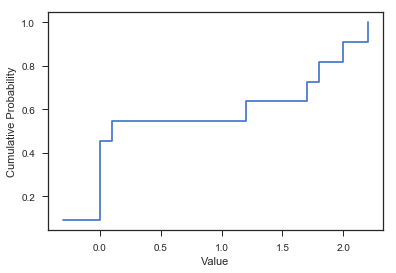

In [3]:
# Artificial data
data = [0.1, 0, 2.2, 0, 0, 1.2, 1.7, 1.8, 0, 2, -0.3]

plt.figure()
ecdf_plot(data)
plt.show()
plt.close()

## Draw a Rug Plot Under the ECDF

To better visualize a data sample, a rug plot can be drawn on top of the ECDF by setting the `rug` parameter to `True`.

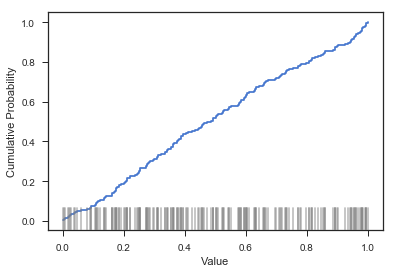

In [4]:
# Uniform random sample
data = st.uniform.rvs(size=200)

plt.figure()
ecdf_plot(data, rug=True)
plt.show()
plt.close()

## Draw a Theoretical CDF

There are several ways to plot a theoretical cumulative distribution function behind an ECDF using the `cdf` parameter.

### Using a Function

If the data come from a known continuous distribution, the true CDF can be plotted behind the ECDF by passing a function as the `cdf` parameter.

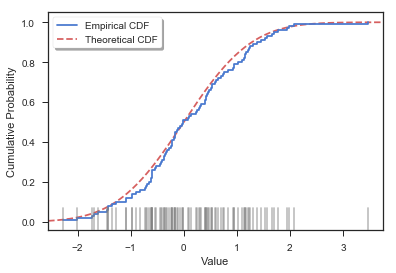

In [5]:
# Underlying distribution: N(0, 1)
dist = st.norm(loc=0, scale=1)

# N(0, 1) random sample
data = dist.rvs(size=100)

plt.figure()
ecdf_plot(data, cdf=dist.cdf, rug=True)
plt.legend(loc="best", frameon=True, shadow=True)
plt.show()
plt.close()

### Using a `scipy.stats.rv_continuous` Object

If the data come from a parametric family of continuous distributions included in the `scipy.stats.rv_continuous` family of distributions, then it might be possible to fit a distribution to the data by passing a `scipy.stats.rv_continuous` object as the `cdf` parameter.
Doing so will plot the CDF of the fitted distribution behind the ECDF.

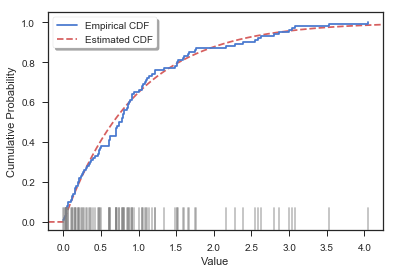

In [6]:
# Exponential random sample
data = st.expon.rvs(size=100)

plt.figure()
ecdf_plot(data, cdf=st.expon, rug=True)
plt.legend(loc="best", frameon=True, shadow=True)
plt.show()
plt.close()

### Using the Name of a `scipy.stats.rv_continuous` Object

Instead of directly passing a `scipy.stats.rv_continuous` object, it is possible to pass the name of such an object as a string to the `cdf` parameter.

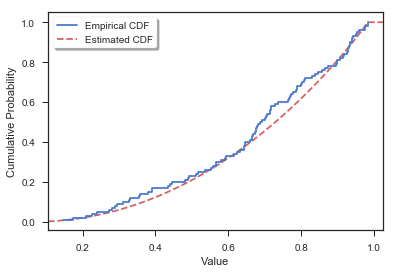

In [7]:
# Beta random sample
data = st.beta.rvs(a=2, b=1, size=100)

plt.figure()
ecdf_plot(data, cdf="beta")
plt.legend(loc="best", frameon=True, shadow=True)
plt.show()
plt.close()

## Plotting Confidence Bands

Let $\widehat{F}$ denote the ECDF of a sample $\mathbf{X}$ of size $n$, and fix $\alpha \in (0, 1)$.
Define
$$
\varepsilon
= \sqrt{\frac{1}{2 n} \log\left(\frac{2}{\alpha}\right)},
$$
and, for $x \in \mathbb{R}$, let
$$
L(x)
= \max\{\widehat{F}(x) - \varepsilon, 0\},
\qquad
U(x)
= \min\{\widehat{F}(x) + \varepsilon, 1\}.
$$
Then the Dvoretzky–Kiefer–Wolfowitz (DKW) inequality implies that
$$
P(L(x) \leq F(x) \leq U(x) \quad\forall x \in \mathbb{R})
\geq 1 - \alpha
$$
for every CDF $F$.
This means that $(L(x), U (x))$ is a non-parametric coefficient-$(1-\alpha)$ confidence band for $F$.

We can plot such a confidence band by setting `cb=True` and specifying `alpha`.

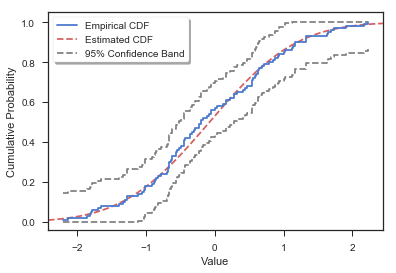

In [8]:
# Normal random sample
data = st.norm.rvs(size=100)

plt.figure()
ecdf_plot(data, cdf="norm", cb=True, alpha=0.05)
plt.legend(loc="best", frameon=True, shadow=True)
plt.show()
plt.close()

## Customizing Features of the Plot

Plotting the ECDF, rug plot, CDF, and confidence bands can all be customized.

### Customizing the ECDF Plot

Customizing the ECDF can be done by passing `matplotlib.axes.Axes.plot` parameters as keyword arguments to `ecdf_plot`.

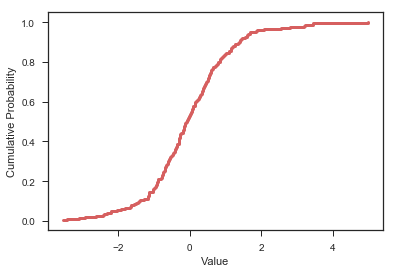

In [9]:
# Student's t random sample
data = st.t.rvs(df=10, size=200)

plt.figure()
ecdf_plot(data, c="r", lw=3)
plt.show()
plt.close()

### Customizing the Rug Plot

Customizing the rug plot can be done by passing a dictionary of `matplot.axes.Axes.axvline` parameters as the `rug_kwargs` parameter to `ecdf_plot`.

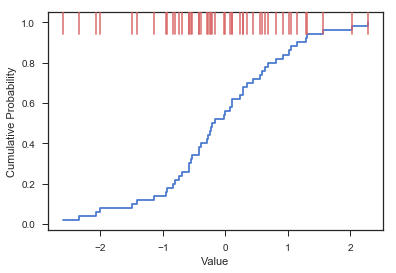

In [10]:
# Normal random sample
data = st.norm.rvs(size=50)

plt.figure()
ecdf_plot(data, rug=True, rug_kwargs={"c": "r", "alpha": 0.8, "ymin": 0.9, "ymax": 1})
plt.show()
plt.close()

### Customizing the CDF

Customizing the CDF plot can be done by passing a dictionary of `matplot.axes.Axes.plot` parameters as the `cdf_kwargs` parameter to `ecdf_plot`.

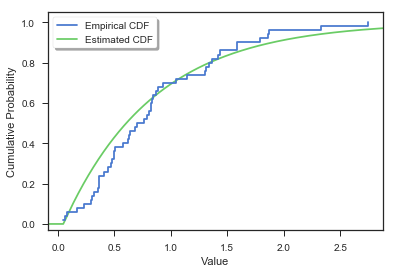

In [11]:
# Exponential random sample
data = st.expon.rvs(size=50)

plt.figure()
ecdf_plot(data, cdf="expon", cdf_kwargs={"c": "g", "ls": "-"})
plt.legend(loc="best", frameon=True, shadow=True)
plt.show()
plt.close()

### Customizing the Confidence Band

Customizing the confidence bands can be done by passing a dictionary of `matplot.axes.Axes.plot` parameters as the `cb_kwargs` parameter to `ecdf_plot`.

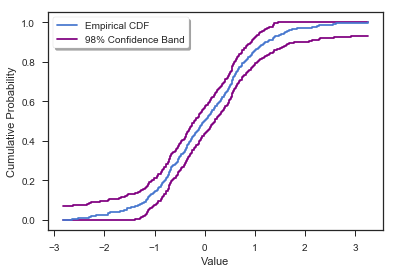

In [12]:
# Normal random sample
data = st.norm.rvs(size=500)

plt.figure()
ecdf_plot(data, cb=True, alpha=0.02, cb_kwargs={"c": "purple", "ls": "-"})
plt.legend(loc="best", frameon=True, shadow=True)
plt.show()
plt.close()

### Specifying the Axes

It is possible to specify the `matplotlib.axes.Axes` object on which to draw an ECDF by passing it as the `ax` parameter to `ecdf_plot`.

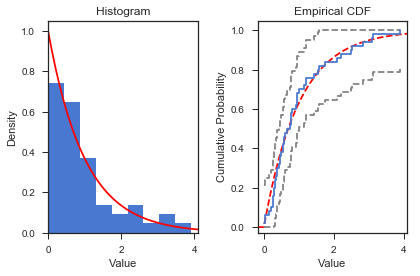

In [13]:
# Exponential random sample
data = st.expon.rvs(size=50)

_, ax = plt.subplots(nrows=1, ncols=2)

ax[0].hist(data, bins="auto", density=True)
x_min, x_max = ax[0].get_xlim()
x = np.linspace(0, x_max, num=100)
ax[0].plot(x, st.expon.pdf(x), c="red")
ax[0].set(xlim=(0, x_max))
ax[0].set(xlabel="Value", ylabel="Density", title="Histogram")

ecdf_plot(data, cdf=st.expon.cdf, cdf_kwargs={"c": "red"}, cb=True, ax=ax[1])
ax[1].set(title="Empirical CDF")

plt.tight_layout()
plt.show()
plt.close()

## References

* Larry Wasserman. *All of nonparametric statistics*.
  Springer Texts in Statistics. Springer, New York, 2006, pp. xii+268.
  ([DOI](https://doi.org/10.1007/0-387-30623-4))